# Molecular system

## With OpenMM from scratch

```python
mport openmm as mm
import openmm.app as app
import openmm.unit as unit
import numpy as np

# Parameters

n_particles = 1
mass = 32.0 * unit.amu
k = 5.0 * unit.kilocalories_per_mole/unit.nanometers**2

# OpenMM topology

topology = app.Topology()

dummy_element = app.Element(0, 'DUM', 'DUM', 0.0 * unit.amu)

chain = topology.addChain('A')
for ii in range(n_particles):
    residue = topology.addResidue('DUM', chain)
    atom = topology.addAtom(name='DUM', element= dummy_element, residue=residue)

# OpenMM system
    
system = mm.System()
for ii in range(n_particles):
    self.system.addParticle(mass)

force = mm.CustomExternalForce('A*(x^2+y^2+z^2)')
force.addGlobalParameter('A', 0.5*k)
for ii in range(n_particles):
    force.addParticle(ii, [])
_ = system.addForce(force)
```

## With this library

This test system is fully documented in HarmonicWell class API. Let’s see an example of how to interact with it:

In [19]:
import numpy as np
from openmm import unit
from matplotlib import pyplot as plt

from uibcdf_systems import HarmonicWell

molecular_system = HarmonicWell(n_particles = 1, mass = 32 * unit.amu,
                                k=5.0 * unit.kilocalories_per_mole/unit.nanometers**2)

The potential expression and the value of the parameters are stored in potential:

In [12]:
molecular_system.potential_expression

0.5*k*(x**2 + y**2 + z**2)

In [13]:
molecular_system.parameters

{'n_particles': 1,
 'mass': Quantity(value=32, unit=dalton),
 'k': Quantity(value=5.0, unit=kilocalorie/(nanometer**2*mole))}

In [14]:
molecular_system.coordinates

Quantity(value=array([[0., 0., 0.]], dtype=float32), unit=nanometer)

In [15]:
molecular_system.topology

<Topology; 1 chains, 1 residues, 1 atoms, 0 bonds>

In [16]:
molecular_system.system

<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x7fd269ac9090> >

There is a method to evaluate the potential at a given positions:

In [17]:
molecular_system.evaluate_potential([-1.5, 0.0, 0.0] * unit.nanometers)

Quantity(value=5.625, unit=kilocalorie/mole)

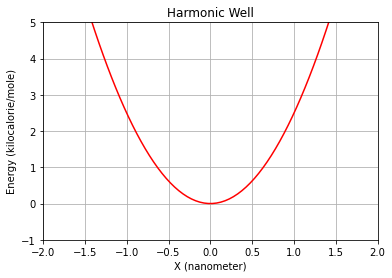

In [20]:
position = np.zeros((200,3), dtype=float) * unit.nanometers
position[:,0] = np.linspace(-5., 5., 200) * unit.nanometers

plt.plot(position[:,0], molecular_system.evaluate_potential(position) , 'r-')
plt.ylim(-1,5)
plt.xlim(-2,2)
plt.grid()
plt.xlabel("X ({})".format(unit.nanometers))
plt.ylabel("Energy ({})".format(unit.kilocalories_per_mole))
plt.title("Harmonic Well")
plt.show()

In [21]:
molecular_system.get_oscillations_time_period()

Quantity(value=7.770948260727904, unit=picosecond)

In [22]:
molecular_system.get_standard_deviation(300.0*unit.kelvin)

Quantity(value=0.34530023967331663, unit=nanometer)